# Numerical Ordinary Differential Equations and Applications
## Computer Project Assignment CP3: Disease outbreak

D. J. Higham and H. Yorston, 
School of Mathematics, University of Edinburgh, 2021


Name: Faidra Antoniadou

In this computer project assignment we will investigate ODEs for the spread of disease. This is a template Jupyter notebook that (i) gets you started and (ii) sets the six tasks that make up the assignment.
In order to complete the assigment, you must perform the six tasks by editing and/or adding further content to this notebook.
Any figure that you produce should have labeled axes, a title, and where appropriate, a legend to distinguish between plots.
To submit your completed work (a) create a pdf version of the notebook when all cells have been run (on a Mac/Safari system this may be done via "File", "Print Preview" and "Export as PDF"), (b) submit both the .ipynb and .pdf versions" electronically on Learn. Hence, you are asked to submit two files: a Jupyter notebook and the corresponding pdf version. If there is any inconsistency between the two files, we will regard the .ipynb version as your definitive submission. Make sure that your name is clearly indicated at the top of notebook.
The deadline is **midday on Monday 8th March** and, as for all continuous assessment in this course, standard University of Edinburgh penalties apply for late submission.

This computer project assignment requires you to use the built-in ODE solver solve_ivp, which is described at 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
This solver gives access to a range of numerical ODE methods. We will be using the default method, RK45. In the cells below there is a fully worked example. We also make use of *partial*, which allows us to fix some of a function's arguments.   

### Background: modelling the spread of an infectious disease

The mathematical modelling of infectious diseases is an important and well-studied area that is currently of particular interest. A simple, but seminal, idea in this field is the Susceptible, Infectious, Recovered (SIR) compartmental model of Kermack and McKendrick [1]; see also (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology). 
In this model, the population splits into three disjoint compartments. At time $t$, we denote the number of  *susceptible* individuals by $S(t)$. These people do not have the disease, but are vulnerable to infection.  We let $I(t)$ denote the number of individuals who have the disease at time $t$; this is the *infected* category. Finally, $R(t)$ denotes the number who have *recovered* from the disease, and are no longer infected nor susceptible (this category could also include deaths from the disease and individuals with immunity). SIR-type models assume that the society in which the disease spreads is homogeneous, finite and closed, i.e,. all individuals are equally likely to become infected and recover, and there are no migrations to or from other societies. These models are relevant for diseases such as influenza (flu), measles, mumps and rubella.

Our SIR model is given by an ODE of the form 
\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI \\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I.
\end{eqnarray*}

In this model, $\beta$  and $\gamma$ are nonnegative parameters. 
To justify the model, we can argue that infection takes place when a susceptible individual intreracts with an infectious individual. Hence, the rate at which susceptible people become infected, $dS/dt$, is proportional to the current levels of both susceptible and infected people.
So $\beta$ quantifies the infectiousness of the disease, and 
$dS/dt = - \beta  SI$.
Similarly, the $\beta  SI$ expression affects $dI/dt$ positively, since a new infection event increases $I(t)$. 

We also assume that infected people recover at a rate determined by the constant $\gamma$.
So $dI/dt$ is affected negatively by $\gamma  I$ and 
$dR/dt$ is affected positively by $\gamma  I$.

[1] Kermack W.O., McKendrick A.G. 1927). "A Contribution to the Mathematical Theory of Epidemics". Proceedings of the Royal Society A. 115 (772): 700–721

In [150]:
# Import the required modules
import numpy as np                # scientific library


import matplotlib.pyplot as plt   # for creating plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # improve resolution

from scipy.integrate import solve_ivp # numerical solver of odes
from functools import partial # allows us to define partial functions

## Application: Flu spreading in a boarding school

We will apply the SIR ODE model above to study an outbreak of the flu in a boarding school. This is a sensible applciation beacuse the model is relevant for a small closed society.
Note that **time will be measured in units of hours throughout this assignment.**

To choose the parameter values, suppose we have data from another school where the spread of the disease has already been monitored. In that other school, it was observed  that in
the beginning of a day there were 40 susceptibles and 8 infected, while the numbers
were 30 and 18, respectively, 24 hours later. Among 15 infected, it was observed that
3 recovered during a day. 

Based on the data that we have been given, it is reasonable to take 
$ \beta=10/(40*8*24)$ and $\gamma=3/(15*24)$.

In the code below, we use these parameters in the case where there is 1 infected student initially and 50 susceptible students. We use the built-in ODE solver solve_ivp to simulate the system of equations numerically over a time interval of 800 hours. We plot the number of individuals in each category as a function of time.


In [151]:
# We first need to define a function that returns the RHS of the ODEs given time,
# variables and parameter values.

def SIR_eqs(t, y, beta, gamma): # define function of time, y and model parameters: t is not used until Task 5
    S, I, R = y # specify variables
    dydt= np.empty(len(y)) # create empty vector and then fill entries with the corresponding RHS
    dydt[0]= -beta*S*I 
    dydt[1]= beta*S*I -gamma*I
    dydt[2]= gamma*I

    return dydt # the function will return the value of the ODE RHS


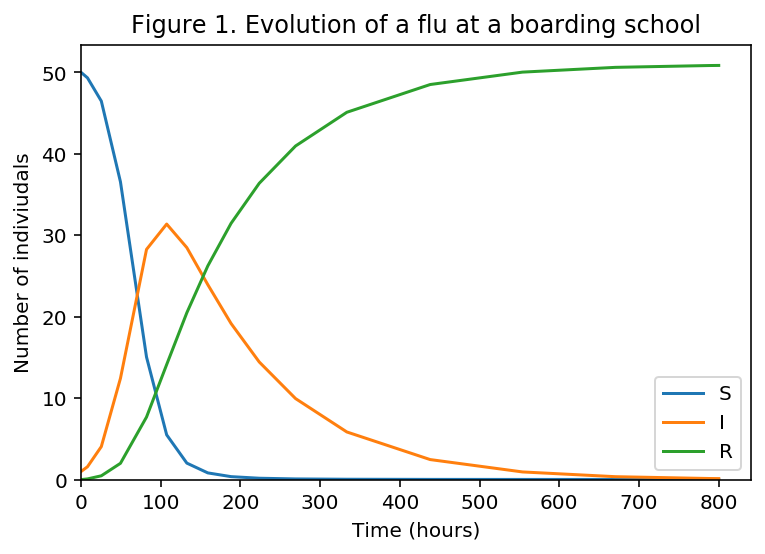

(a) Total number of individuals infected by the final time T = 187
(a) Total number of individuals currently infected (at the final time T) = 0
(b) Maximum number of individuals simultaneously infected at any time = 31
(c) Time at which maximum number of individuals was simultaneously affected = 107.4484478467943


In [153]:
## Evolution of flu at a boarding school

# Create an array with the initial conditions
y0=np.array([50,1,0]) 

# Create a partial version of the equations function specifying the parameter values
eqs1 = partial(SIR_eqs, beta=10/(40*8*24), gamma=3/(15*24))

# Use solve_ivp to solve the model with the specified equations and parameter
# values (eqs1), initial conditions (y0), and simulate up to 800 hours. 

sol = solve_ivp(eqs1, [0,800], y0,dense_output=True)

# Plot solution
plt.figure(1)
plt.plot(sol.t, sol.y[0],label='S')
plt.plot(sol.t, sol.y[1],label='I')
plt.plot(sol.t, sol.y[2],label='R')
# Label axis
plt.xlabel('Time (hours)')
plt.ylabel('Number of indiviudals')
plt.xlim(0)
plt.ylim(0)
# Create a title and a legend
plt.title('Figure 1. Evolution of a flu at a boarding school')
plt.legend()
plt.show() 


### EXTRA CODE FOR TASK 1 goes here

# the total number of individuals at the final time T who are either currently infected or 
# Total number of individuals infected:
print('(a) Total number of individuals infected by the final time T = ' + str(int(round(np.sum(sol.y[1])))))
print('(a) Total number of individuals currently infected (at the final time T) = ' + str(int(round(sol.y[1][-1]))))

# the maximum number of individuals simultaneously infected at any time t during the outbreak
print('(b) Maximum number of individuals simultaneously infected at any time = ' + str(int(round(max(sol.y[1])))))

# the time t (in hours) at which the maximum in part (b) occurs.
print('(c) Time at which maximum number of individuals was simultaneously affected = ' + str(float(sol.t[np.where(sol.y[1] == max(sol.y[1]))])))

# Task 1: Examining the output
[2 marks]

By adding some extra code at the end of the example above, report the following.
(Note that humans are measured using whole numbers, so in some cases below you will need to round to the nearest integer.) 

(a) the total number of individuals at the final time $T$ who are either currently infected or have been infected during this outbreak,  

(b) the maximum number of individuals simultaneously infected at any time $t$ during the outbreak,

(c) the time $t$ (in hours) at which the maximum in part (b) occurs.

[You may find it helpful to use the Python functions max and argmax.]

Solution based on code:

(a) The total number of individuals who are currently infected at the final time $T$ is zero, while those who have been infected during the outbreak are 187.

(b) The maximum number of individuals simultaneously infected at any time $t$ is 31.

(c) The time $t$ (in hours at which the maximum in part (b) occurs is 107 hours (to the nearest hour).


# Task 2: Handwashing campaign
[2 marks]

Suppose now that a “wash your hands” campaign was launched at time zero, having the effect of reducing the infectiousness parameter $\beta$ by a factor of 5. Repeat the calculation above with this change. Plot the same graph as before for this new scenario, but up to time $T = 1600$ hours. Report the new values corresponding to (a), (b) and (c) in Task 1, and briefly comment on the effect of the campaign. 


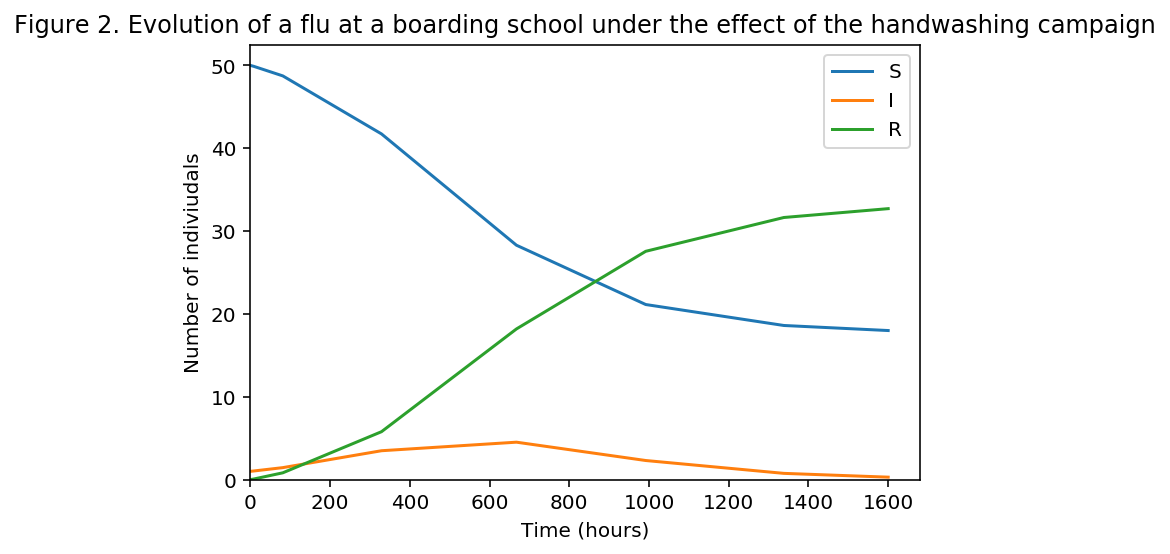

(a) Total number of individuals infected by the final time T = 17
(a) Total number of individuals currently infected (at the final time T) = 0
(b) Maximum number of individuals simultaneously infected at any time = 5
(c) Time at which maximum number of individuals was simultaneously affected = 667.3444828019788


In [154]:
## Task 2: Flu spread with "wash your hands" campaign

## Evolution of flu at a boarding school under the effect of the "wash your hands campaign"

# Create a partial version of the equations function specifying the parameter values
eqs2 = partial(SIR_eqs, beta=2/(40*8*24), gamma=3/(15*24))

# Use solve_ivp to solve the model with the specified equations and parameter
# values (eqs1), initial conditions (y0), and simulate up to 1600 hours. 

sol_wash = solve_ivp(eqs2, [0,1600], y0, dense_output=True)

# Plot solution
plt.figure(2)
plt.plot(sol_wash.t, sol_wash.y[0],label='S')
plt.plot(sol_wash.t, sol_wash.y[1],label='I')
plt.plot(sol_wash.t, sol_wash.y[2],label='R')
# Label axis
plt.xlabel('Time (hours)')
plt.ylabel('Number of indiviudals')
plt.xlim(0)
plt.ylim(0)
# Create a title and a legend
plt.title('Figure 2. Evolution of a flu at a boarding school under the effect of the handwashing campaign')
plt.legend()
plt.show() 

# Total number of individuals infected:
print('(a) Total number of individuals infected by the final time T = ' + str(int(round(np.sum(sol_wash.y[1])))))
print('(a) Total number of individuals currently infected (at the final time T) = ' + str(int(round(sol_wash.y[1][-1]))))

# the maximum number of individuals simultaneously infected at any time t during the outbreak
print('(b) Maximum number of individuals simultaneously infected at any time = ' + str(int(round(max(sol_wash.y[1])))))

# the time t (in hours) at which the maximum in part (b) occurs.
print('(c) Time at which maximum number of individuals was simultaneously affected = ' + str(float(sol_wash.t[np.where(sol_wash.y[1] == max(sol_wash.y[1]))])))

Solution based on code:

(a) The total number of individuals who are currently infected at the final time $T$ is 0, while those who have been infected during the outbreak are 17.

(b) The maximum number of individuals simultaneously infected at any time $t$ is 5.

(c) The time $t$ (in hours at which the maximum in part (b) occurs is 667 hours (to the nearest hour).

It is quite clear that these numbers have significantly decreased compared to Task 1, so the "wash your hands" campaign decreases the spread of the disease. Maximum numbers of individuals affected decreases by a factor of 11 and the peak to be reached is reached around 6 times slower.

# Task 3: Outbreak or not
[2 marks]

For the number of infected individuals $I$ to increase, the rate of change $\frac{dI}{dt}$ must be positive. From the form of the SIR ODE system, we see that this corresponds to $\beta S  I - \gamma I > 0$. 

Hence initially, at time $t = 0$, the infected group of individuals starts to grow when 
$$\beta S(0)  I(0) - \gamma I(0) >0. $$
In our case, we have $I(0) = 1$ infected individual and $S(0) = 50$ susceptibles, and this inequality becomes  
$$\frac{\beta 50}{\gamma}>1.$$

Hence, if we think of $\gamma=3/(15*24)$ as fixed, it is reasonable to expect that the disease will not take hold if $\beta < \beta^\star$, where 
$$
\beta^\star = \frac{\gamma}{50} \approx 1.667 \times {10}^{-4}.
$$

This argument is not rigorous, because it is relevant only for short time periods.

By simulating the ODE over 1000 hours using $\gamma=3/(15*24)$ and the same initial conditions as above, and examining the peak infection level for various choices of $\beta$, produce a plot that indicates whether the inequality $\beta < \beta^\star$ can be used to predict when an outbreak will occur.
Write a brief summary (one or two sentences) giving your conclusion.

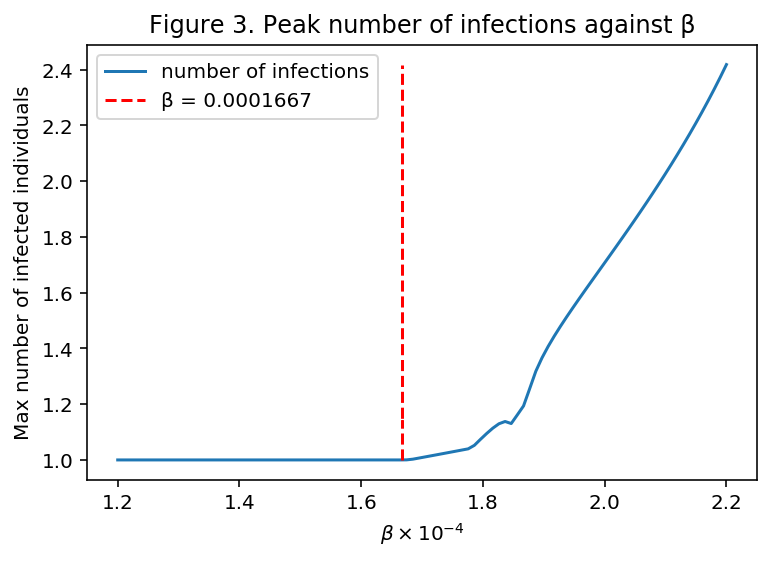

In [129]:
## Task 3: Outbreak or not

## code goes here

## Evolution of flu at a boarding school

# Create an array with the initial conditions

# Create an array for beta values
beta_array = np.linspace(1.2e-4, 2.2e-4, 100)

# Create an empty array for the peak infection level
peak_ill = []
peak_time = []

for i in range(len(beta_array)):

    # Create a partial version of the equations function specifying the parameter values
    eqs3 = partial(SIR_eqs, beta=beta_array[i], gamma=3/(15*24))

    # Use solve_ivp to solve the model with the specified equations and parameter
    # values (eqs1), initial conditions (y0), and simulate up to 1000 hours. 

    sol3 = solve_ivp(eqs3, [0,1000], y0, dense_output=True)
    
    peak_ill.append(max(sol3.y[1]))
    peak_time.append(sol3.t[np.where(sol3.y[1] == max(sol3.y[1]))])
    

# Plot solution
plt.figure(3)
plt.plot(beta_array*10000, peak_ill, label='number of infections')
plt.plot([1.667]*len(peak_ill),peak_ill,'r--',label='β = 0.0001667')
#plt.plot(beta_array, peak_time, label='peak infection time')
# Label axis
plt.xlabel(r'$\beta \times 10^{-4}$')
plt.ylabel('Max number of infected individuals')
plt.legend()
# Create a title and a legend
plt.title('Figure 3. Peak number of infections against β')
plt.show() 

Having plotted the number of infected individuals during the peak of the outbreak for different values of $\beta$ close to $\beta ^\star$ we see that the maximum number of infected individuals level exactly up to $\beta ^\star$ and then it begins increasing rapidly. This indicates that for values $\beta < \beta^\star$, an outbreak has not occurred as the disease did not spread to more than 1 individual. Therefore, the inequality $\beta < \beta^\star$ can be used to predict if an outbreak will occur.

# Task 4: Time restricted immunity
[3 marks]

We will now assume that immunity after the disease does not last indefinitely. 
This implies that *recovered* individuals may become *susceptible* again. 
We will suppose that loss of immunity (i.e., moving from category R to S) 
happens at a rate that is proportional to the number of recovered individuals. 
Let $\mu$ denote the relevant rate constant.

The new SIR model is then given by the following equations:

\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI + \mu R\\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I - \mu R.\\
\end{eqnarray*}

Note that $\mu$ is a nonnegative parameter such that that $\mu^{-1}$ gives the typical amount of time it takes to lose immunity.



Suppose that the typical time to lose immunity is 50 days.
So $\mu = 1/(50*24)$. Solve the ODE for $\gamma =0.0085$, $\beta=0.00033$ and the same initial conditons as above,
and plot the evolution of the three categories over 300 days. 

**Note: Time is in units of hours so 300 days = 7200 hours**

In [126]:
def SIR_eqs4(t, y, beta, gamma, mu): # define function of time, y and model parameters
    S, I, R = y # specify variables
    dydt= np.empty(len(y)) # create empty vector and then fill entries with the corresponding RHS
    dydt[0]= -beta*S*I + mu*R
    dydt[1]= beta*S*I - gamma*I
    dydt[2]= gamma*I - mu*R

    return dydt # the function will return the value of the ODE RHS

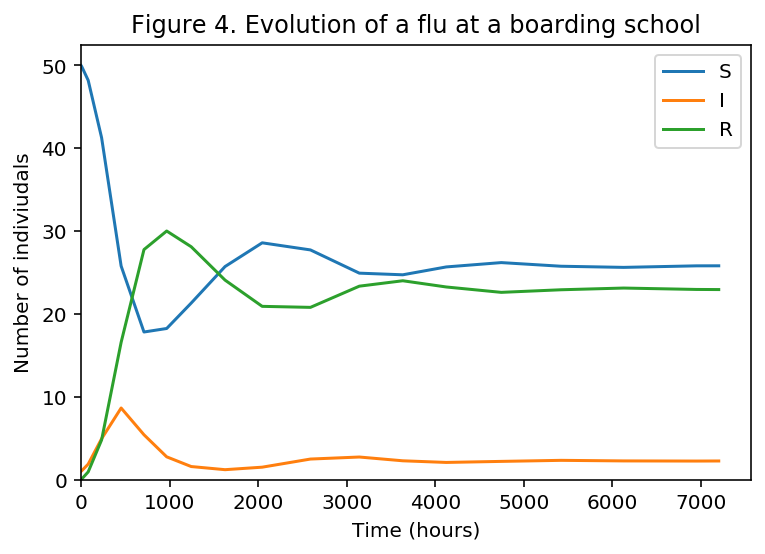

In [155]:
## Evolution of flu at a boarding school 

# Create a partial version of the equations function specifying the parameter values
eqs4 = partial(SIR_eqs4, beta=0.00033, gamma=0.0085, mu=1/(50*24))

# Use solve_ivp to solve the model with the specified equations and parameter
# values (eqs1), initial conditions (y0), and simulate up to 7200 hours. 

sol4 = solve_ivp(eqs4, [0,7200], y0, dense_output=True)

# Plot solution
plt.figure(4)
plt.plot(sol4.t, sol4.y[0],label='S')
plt.plot(sol4.t, sol4.y[1],label='I')
plt.plot(sol4.t, sol4.y[2],label='R')
# Label axis
plt.xlabel('Time (hours)')
plt.ylabel('Number of indiviudals')
plt.xlim(0)
plt.ylim(0)
# Create a title and a legend
plt.title('Figure 4. Evolution of a flu at a boarding school')
plt.legend()
plt.show() 

# Task 5: incorporating vaccination
[3 marks]

Imagine that the local health authority launches a vaccination campaign
that starts on day 6 of the outbreak and finishes at the end of day 15. 

We may introduce a category V for individuals who have been vaccinated.
We will assume that at any time during the vaccination phase, any susceptible individual has a 
fixed chance of receiving a successful vaccination.

The new, extended, ODE system becomes 
\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI + \mu R -p(t) S\\
\frac{dV}{dt} &=& p(t) S\\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I - \mu R.\\
\end{eqnarray*}

Here, $p(t)$ is defined by 

$$p(t)=
\left\{
\begin{array}{ll}
p  & \mbox{if } 6·24 \leq t \leq 15·24  \\
0 & \mbox{otherwise }
\end{array}
\right.$$

where $p$ is a constant that quantifies the effectiveness of the vaccination campaign.
Note that we must multiply the $t$ value by 24 because, throughout this assignment, $t$ is measured in hours, not
days. 


With all other parameters as in Task 4, solve this ODE model for the case 
$p=0.005$ and plot the evolution of the four categories over 100 days.


In [147]:
## Task 5

def p_effect(t): # define function p
    if(t >= 6*24 and t <= 15*24):
        p = 0.005
    else:
        p = 0
    return p    

def SVIR_eqs(t, y, beta, gamma, mu): # define function of time, y and model parameters
    S, V, I, R = y # specify variables
    dydt= np.empty(len(y)) # create empty vector and then fill entries with the corresponding RHS
    dydt[0]= -beta*S*I + mu*R - p_effect(t)*S
    dydt[1]= p_effect(t)*S
    dydt[2]= beta*S*I - gamma*I
    dydt[3]= gamma*I - mu*R
    return dydt # the function will return the value of the ODE RHS

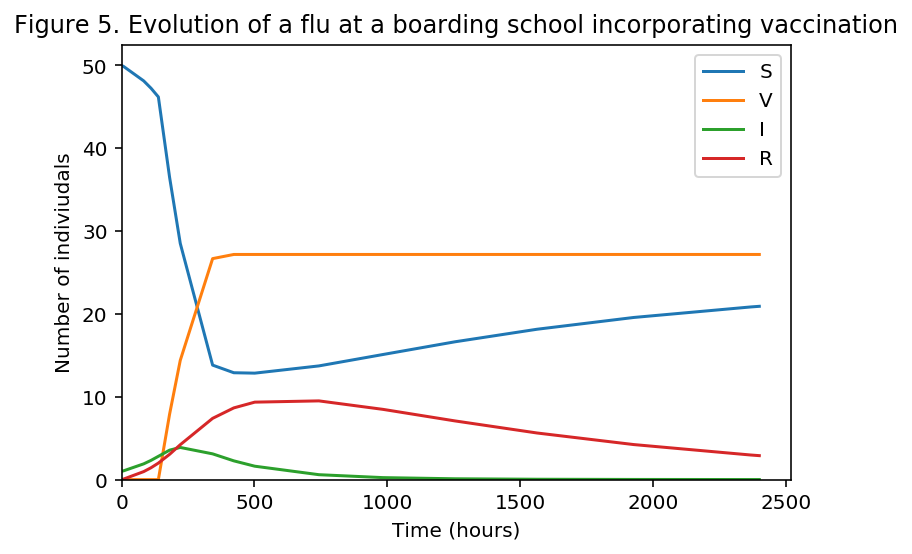

In [157]:
## Evolution of flu at a boarding school 

# Create array for initial conditions including V
y0=np.array([50,0,1,0]) 

# Create a partial version of the equations function specifying the parameter values
eqs_vacc = partial(SVIR_eqs, beta=0.00033, gamma=0.0085, mu=1/(50*24))

# Use solve_ivp to solve the model with the specified equations and parameter
# values (eqs1), initial conditions (y0), and simulate up to 2400 hours. 

sol_vacc = solve_ivp(eqs_vacc, [0,2400], y0, dense_output=True)

# Plot solution
plt.figure(5)
plt.plot(sol_vacc.t, sol_vacc.y[0],label='S')
plt.plot(sol_vacc.t, sol_vacc.y[1],label='V')
plt.plot(sol_vacc.t, sol_vacc.y[2],label='I')
plt.plot(sol_vacc.t, sol_vacc.y[3],label='R')


# Label axis
plt.xlabel('Time (hours)')
plt.ylabel('Number of indiviudals')
plt.xlim(0)
plt.ylim(0)
# Create a title and a legend
plt.title('Figure 5. Evolution of a flu at a boarding school incorporating vaccination')
plt.legend()
plt.show() 

# Task 6
[3 marks]

All the models in this assignment have the property that, for any initial condition, the sum of the solution components is constant for all time. This makes sense, because the total population is not changing---individuals are moving between compartments.

Let's focus on the original SIR ODE:
\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI \\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I.
\end{eqnarray*}
Summing these equations we have
$$
\frac{d(S+I+R)}{dt} = 0,
$$
which confirms that the sum $S(t) + I(t) + R(t)$ remains constant for all time.


Show that Euler's method on this SIR model, **for any stepsize $h>0$**, produces
a numerical solution that is guaranteed to **exactly** preserve the sum over the three compartments at every time point.

 Use the Markdown cell below to give your answer.
[*Note that this task is not asking you to write any Python code. A few sentences involving some mathematics is required.*]


By Euler's Method $y_{n+1} = y_n + hf(y_n,t_n)$ for a given $y$ variable and where $f(y_n,t_n) = \frac{dy_n}{dt_n}$. Thereby, using this method to solve for $S, I$ and $R$ for a ste of $N$ time points yields:

\begin{eqnarray*}
S_{n+1} &=& S_n - h\beta S_n I_n \\
I_{n+1} &=& I_n + h\beta S_n I_n - h\gamma I_n \\
R_{n+1} &=& r_n + h\gamma I_n \\
\end{eqnarray*}
where $n = 0,1,2,\cdots,N$

The sum over the 3 components is therefore:
\begin{eqnarray*}
S_{n+1} + I_{n+1} + R_{n+1} &=& S_n - h\beta S_n I_n + I_n + h\beta S_n I_n - h\gamma I_n + r_n + h\gamma I_n
\end{eqnarray*}

Terms cancel so we obtain:

\begin{eqnarray*}
\\ S_{n+1} + I_{n+1} + R_{n+1} &=& S_n + I_n + R_n
\end{eqnarray*}

Thereby, Euler's method produces a numerical solution that is guaranteed to exactly preserve the sum over the three components at every time point, $t_n$, for any stepsize $h>0$.

